In [2]:
!pip install missingno

In [66]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

### Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

In [4]:
train = pd.read_csv("C:/Users/tazts/Desktop/git_presentation/gb/train.csv")
test = pd.read_csv("C:/Users/tazts/Desktop/git_presentation/gb/test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [97]:
[x for x in train.columns if x not in test.columns]

['target']

In [51]:
des = train.describe()
des

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [59]:
des = des.transpose()

<AxesSubplot:>

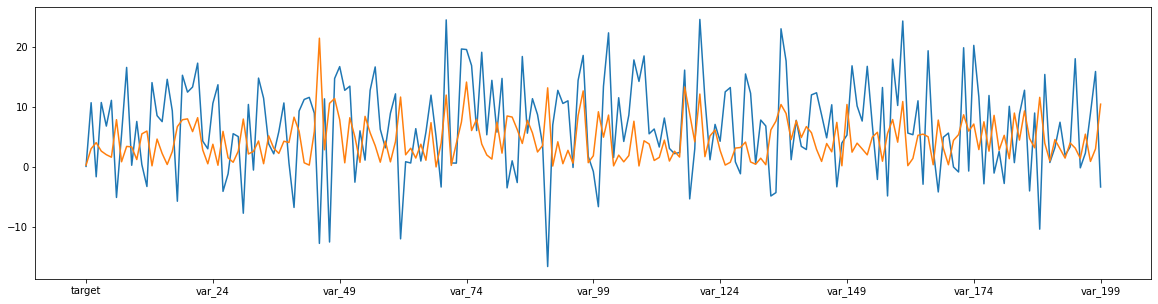

In [63]:
fig = plt.figure(figsize=(20, 5))
des['mean'].plot()
des['std'].plot()

<AxesSubplot:>

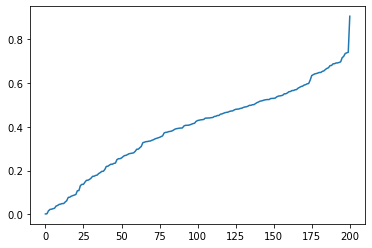

In [85]:
scaler = MinMaxScaler()
scaler.fit(des)
des_n = scaler.transform(des)
des_n= pd.DataFrame(data = des_n, columns=des.columns)
des_n['m-s']=abs(des_n['mean']-des_n['std'])
des_n['m-s'].sort_values().reset_index(drop = True).plot()

In [6]:
train.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [95]:
test.tail()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122
199999,test_199999,10.4664,1.8070,10.2277,6.0654,10.0258,1.0789,4.8879,14.4892,-0.5902,...,0.1398,9.2828,1.3601,4.8985,20.0926,-1.3048,-2.5981,10.3378,14.3340,-7.7094


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


<AxesSubplot:>

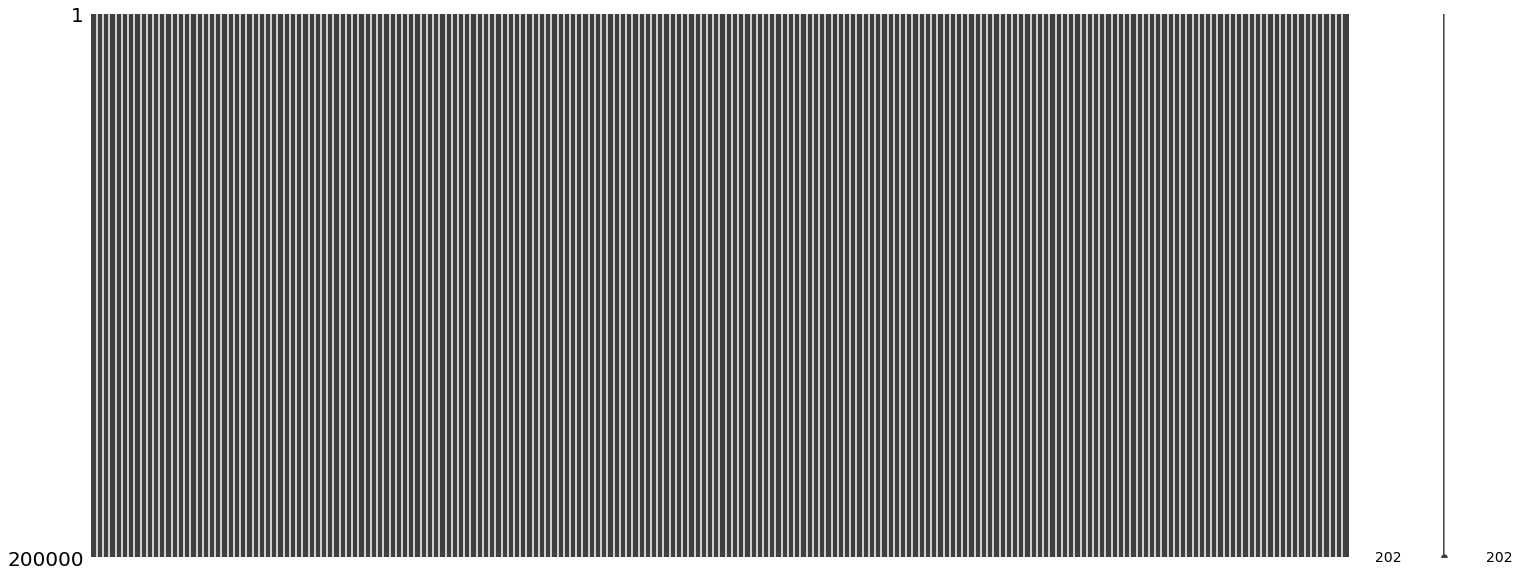

In [8]:
msno.matrix(train)

### Вывод 1

Размерность датасетов не совпадает: в тестовой выборке нет таргета. Видим сильные отклонения между std и mean, что говорит о выбрасах. Пропуски отсутствуют.

### Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;

<AxesSubplot:>

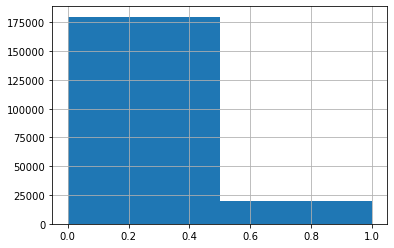

In [9]:
target = train["target"]
target.hist(bins=2)

In [89]:
len(train.loc[train['target']==0, 'target'])/len(train.loc[train['target']==1, 'target'])

8.951238929246692

### Вывод 2

Целевая переменная имеет 2 значения: 1 и 0. Очень сильно несбалансированна, значений "1" почти в 9 раз меньше, чем 0. Для обучения пригодился бы бутстрап. 

### Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

In [26]:
feature_1 = ['var_0', 'var_1', 'var_2', 'var_5', 'var_9', 'var_10', 'var_13', 'var_20', 'var_26', 'var_40', 'var_55', 'var_80', 'var_106', 'var_109', 'var_139', 'var_175', 'var_184', 'var_196']


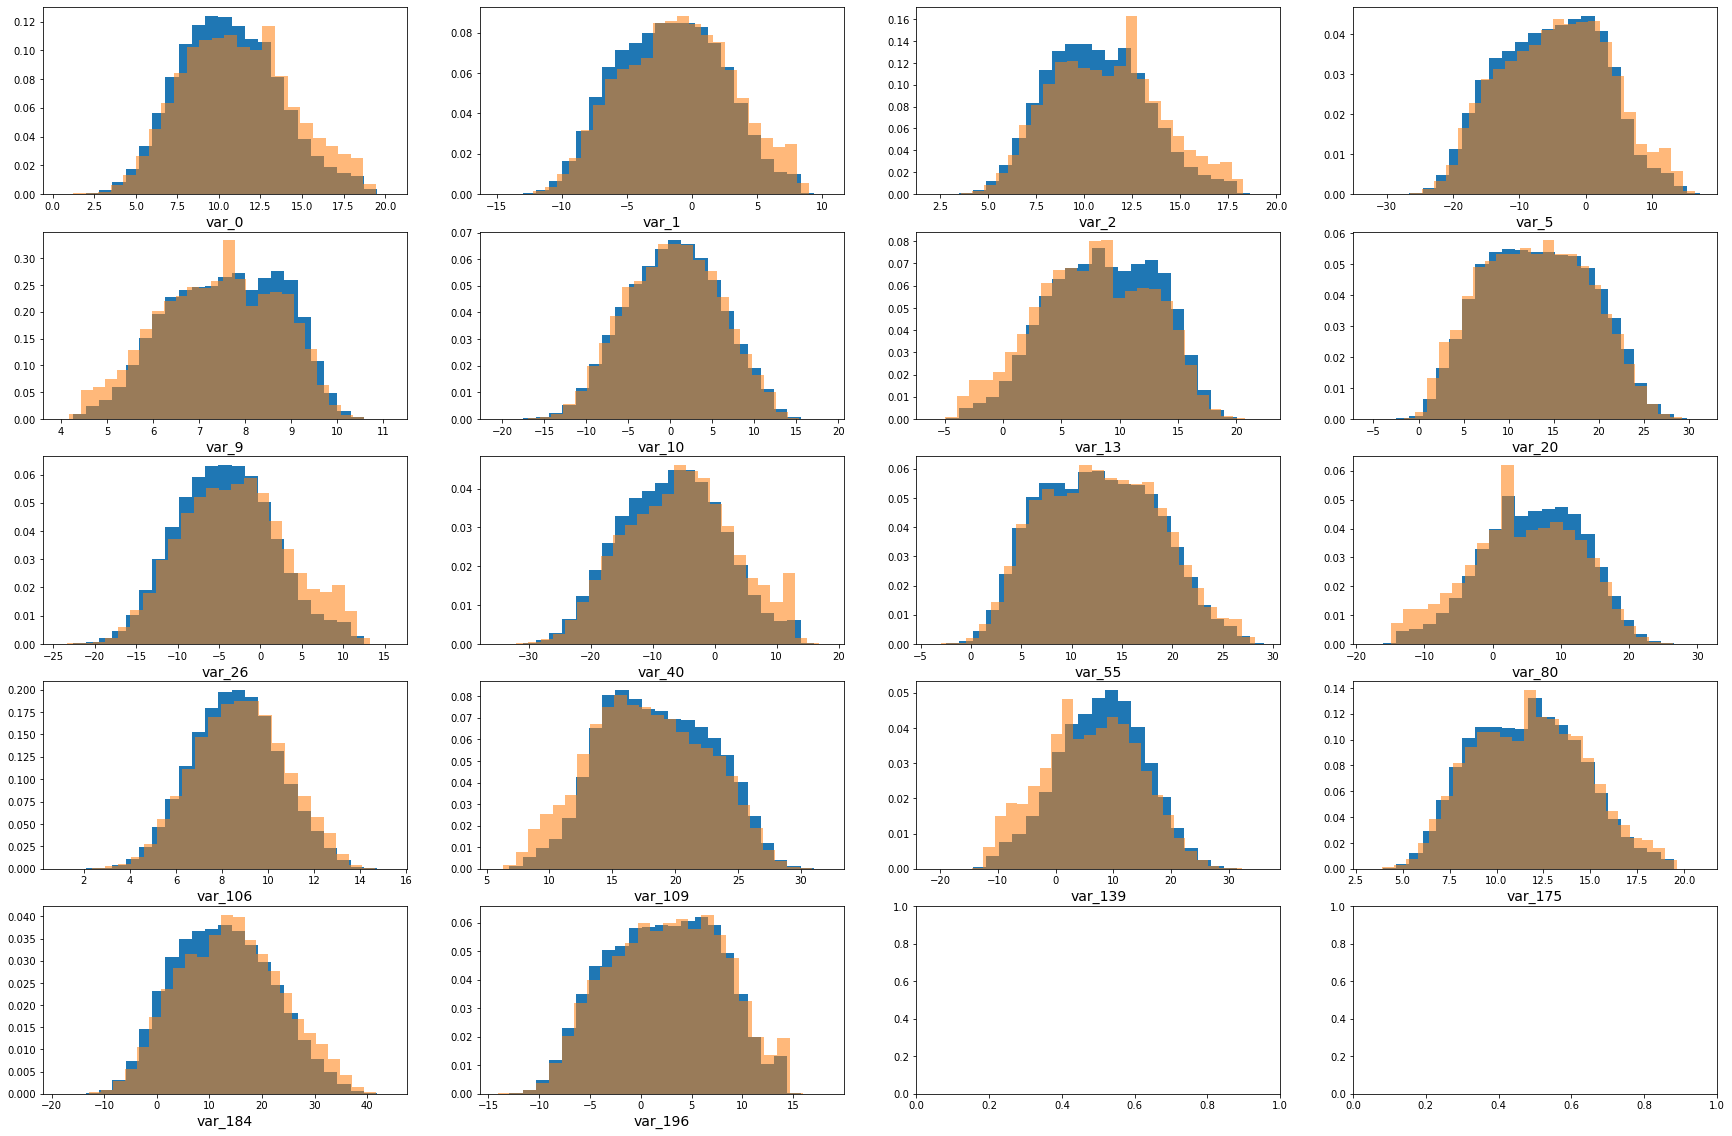

In [27]:
fig, axes = plt.subplots(5, 4, figsize=(30, 20))
for num, feature in enumerate(feature_1):
    axes[num//4, num%4].hist(train.loc[train['target']==0, feature], bins=25,density=True)
    axes[num//4, num%4].hist(train.loc[train['target']==1, feature], bins=25,alpha=0.55,density=True)
    axes[num//4, num%4].set_xlabel(feature, fontsize=14)

### Вывод 3

Видим, что распределения выбранных признаков очень близки. Но в тестовой выборке какие то странные выбросы - на переменных vr_0, var_2, var_9, var_13, var_40, var_80, var_139. 

### Задание 4: Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

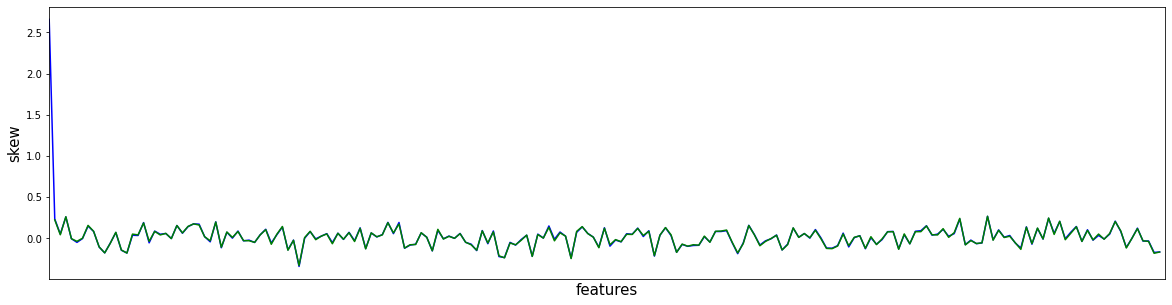

In [33]:
fig = plt.figure(figsize=(20, 5))
train_stats, test_stats = train.skew(), test.skew()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks([])
plt.xlabel("features", size=15)
plt.xlim(0, len(train_stats))
plt.ylabel("skew", size=15)
plt.show()

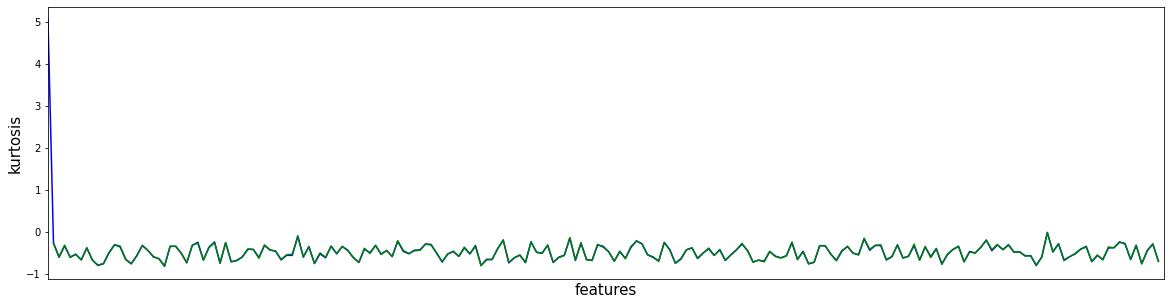

In [34]:
fig = plt.figure(figsize=(20, 5))
train_stats, test_stats = train.kurtosis(), test.kurtosis()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks([])
plt.xlabel("features", size=15)
plt.ylabel("kurtosis", size=15)
plt.xlim(0, len(train_stats))
plt.show()

### Вывод 4

Мы видим, что статистические признаки очень схожи, графики почти повторяют друг друга.

### Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

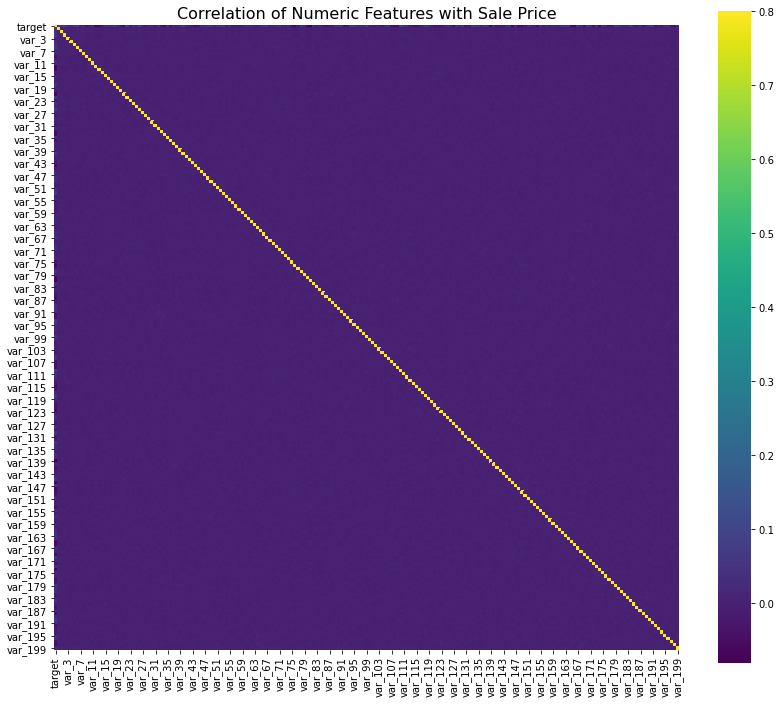

In [36]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=16)
sns.heatmap(train.corr(), square=True, vmax=0.8, cmap="viridis")

C:\Users\tazts\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tazts\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


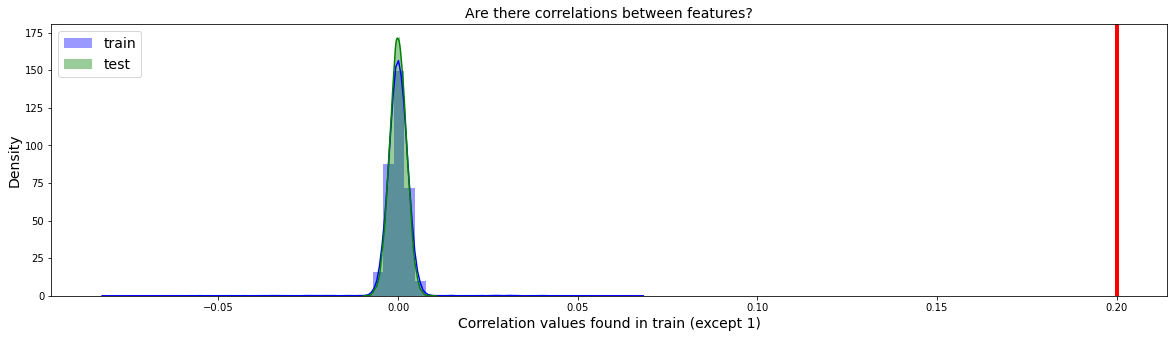

In [42]:
train_correlations = train.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]


test_correlations = test.corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)
plt.axvline(0.2,linewidth=4, color='r')

### Вывод 1

Видим, что признаки не имеют линейной зависимости между собой и таргетом.

### Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [46]:
parameters = {"max_depth": 10, "n_estimators": 100, "random_state": 42, "n_jobs": -1}
target = train["target"]

forest = RandomForestClassifier(**parameters)
forest.fit(train.drop(["target", "ID_code"], axis=1), target)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

Text(0.5, 1.0, 'What are the top important features to start with?')

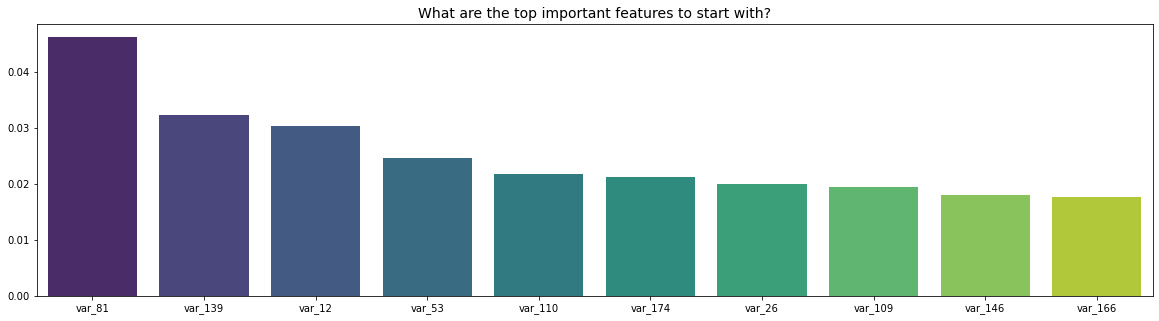

In [49]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = train.drop(["target", "ID_code"], axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

In [104]:
oversample = SMOTE()
X, y = oversample.fit_resample(train.drop(["target", "ID_code"], axis=1), target)

In [105]:
forest = RandomForestClassifier(**parameters)
forest.fit(X, y)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

Text(0.5, 1.0, 'What are the top important features to start with?')

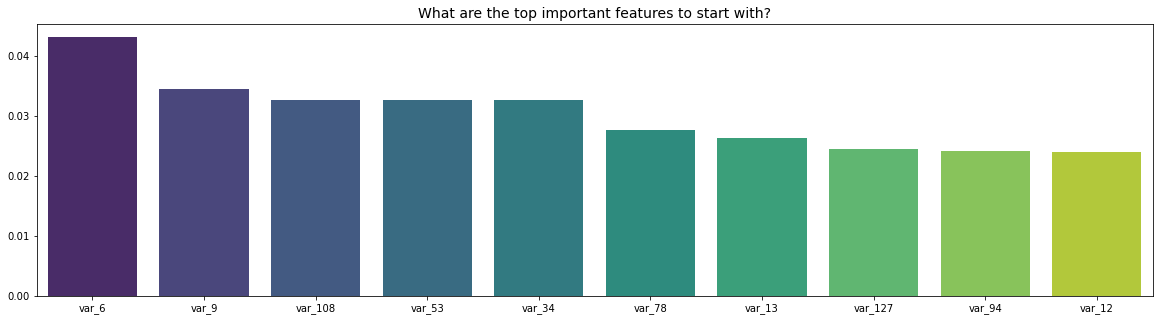

In [106]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = train.drop(["target", "ID_code"], axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

### Вывод 6

у ТОП-10 нелинейнозависимых признаком коээфициэнт влияния на таргет не высок. После использлвагия SMOTE стали важны совсем другие признаки

### Задание 7 (опция): Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

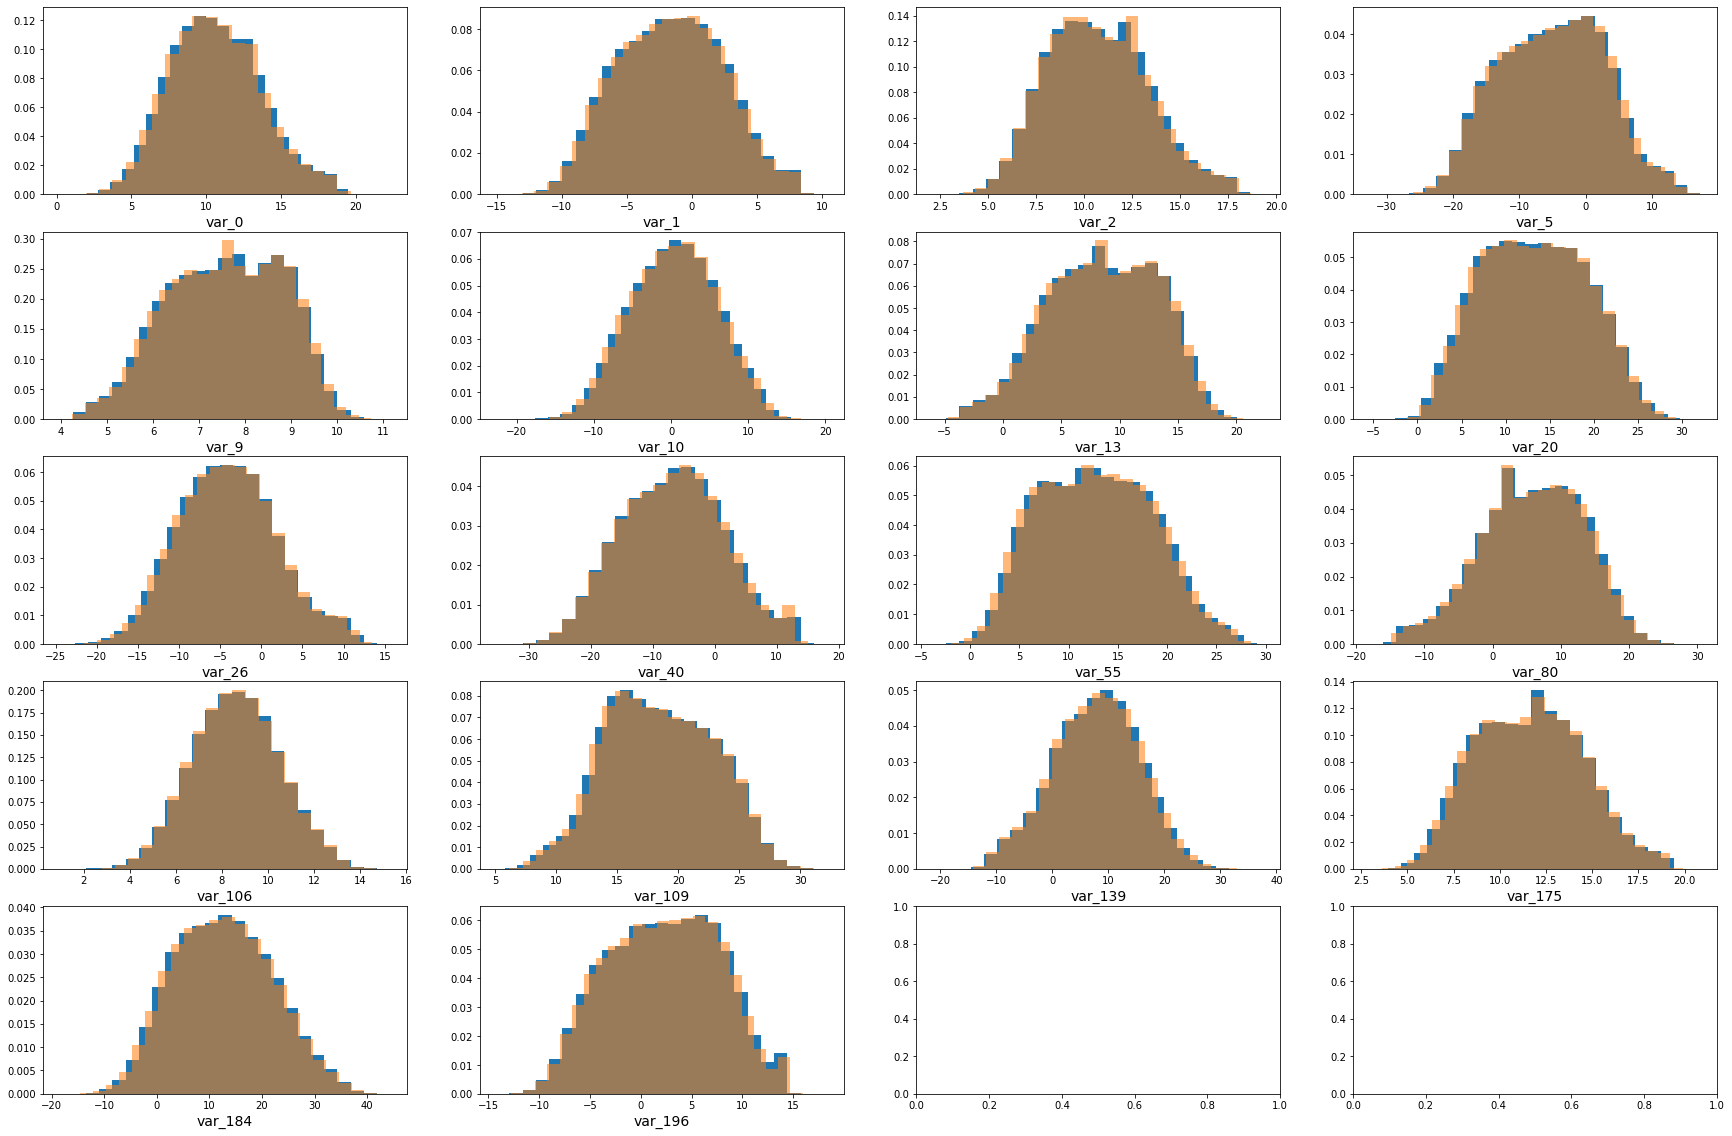

In [50]:
fig, axes = plt.subplots(5, 4, figsize=(30, 20))
for num, feature in enumerate(feature_1):
    axes[num//4, num%4].hist(train[feature], bins=25,density=True)
    axes[num//4, num%4].hist(test[ feature], bins=25,alpha=0.55,density=True)
    axes[num//4, num%4].set_xlabel(feature, fontsize=14)

### Вывод 7

Видим, что распределения очень схожи.